**Airbnb Listings Preprocessing for Machine Learning**

# Intro

## Read in libraries, data, and set notebook preferences

In [82]:
#Read in libraries
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [83]:
#Set path to listings data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate'

#Set list of date columns to parse
dates = ['first_review', 'host_since', 'last_review']

#Read in file
listings = pd.read_csv(path + '/2020_0201_Listings_Cleaned.csv',index_col=0,dtype= {'review_scores_accuracy':'category', 'review_scores_checkin':'category', 
                                                                                    'review_scores_cleanliness':'category','review_scores_communication':'category',
                                                                                    'review_scores_location':'category','review_scores_rating':'category',
                                                                                    'review_scores_value':'category', 'day':'category', 'host_response_rate':'category',
                                                                                    'month':'category', 'year':'category','availability_30':'category','availability_365':'category',
                                                                                    'zipcode':'object'}, parse_dates=dates)

In [84]:
#Set style for matplotlib
plt.style.use('ggplot')

#Set options for pandas
pd.options.display.max_columns =1_000
pd.set_option('display.max_rows', 1_000)
pd.set_option('display.float_format', '{:.2f}'.format)

## Preview Data

In [85]:
#Print listings shape and view head
print('Listings shape: ', listings.shape)
listings.head()

Listings shape:  (98781, 75)


,access,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_maximum_nights,maximum_minimum_nights,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,state,summary,transit,zipcode,weekday,day,month,year,month_year
90917,Unavailable,4,Cable TV Wifi Kitchen Buzzer wireless interco...,23,92,1.00,Real Bed,1.00,2.00,1,0.00,0.00,7 months ago,strict_14_with_grace_period,San Francisco,120.00,"Great 1-bedroom,1-bath on border between the M...",10.00,2010-08-20,2,"(Hidden by Airbnb) Likes:\r\nFauxnique, bodyFi...",True,196626,True,False,2.00,"San Francisco, California, United States",Paul,Mission District,100.0,within an hour,2010-08-09,email phone facebook reviews kba,As much as I LOVE pets my building unfortunate...,44680,False,Unavailable,True,2010-10-04,37.75,Unavailable,-122.42,60.00,30.00,Cute Noe/Mission Apartment,Unavailable,Mission,Unavailable,3,0.00,175.00,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.03,Entire home/apt,1000.00,"Great 1-bedroom,1-bath on border between the M...",CA,Unavailable,Unavailable,94110,Monday,4,10,2010,2010-10
75033,Unavailable,4,Cable TV Wifi Kitchen Buzzer wireless interco...,0,119,1.00,Real Bed,1.00,2.00,1,0.00,0.00,9 months ago,strict_14_with_grace_period,San Francisco,120.00,"Great 1-bedroom,1-bath on border between the M...",10.00,2010-08-20,2,"(Hidden by Airbnb) Likes:\r\nFauxnique, bodyFi...",True,196626,True,False,2.00,"San Francisco, California, United States",Paul,Mission District,100.0,within an hour,2010-08-09,email phone facebook reviews kba,As much as I LOVE pets my building unfortunate...,44680,False,Unavailable,True,2010-10-04,37.75,Unavailable,-122.42,60.00,30.00,Cute Noe/Mission Apartment,Unavailable,Mission,Unavailable,3,0.00,175.00,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.03,Entire home/apt,1000.00,"Great 1-bedroom,1-bath on border between the M...",CA,Unavailable,Unavailable,94110,Monday,4,10,2010,2010-10
60532,Unavailable,4,Cable TV Wifi Kitchen Buzzer wireless interco...,0,40,1.00,Real Bed,1.00,2.00,1,0.00,0.00,3 weeks ago,strict_14_with_grace_period,San Francisco,120.00,"Great 1-bedroom,1-bath on border between the M...",10.00,2010-08-20,2,"(Hidden by Airbnb) Likes:\r\nFauxnique, bodyFi...",True,196626,True,False,2.00,"San Francisco, California, United States",Paul,Mission District,100.0,within a few hours,2010-08-09,email phone facebook reviews kba,As much as I LOVE pets my building unfortunate...,44680,False,Unavailable,True,2010-10-04,37.75,Unavailable,-122.42,60.00,31.00,Cute Noe/Mission Apartment,Unavailable,Mission,Unavailable,3,0.00,175.00,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.03,Entire home/apt,1000.00,"Great 1-bedroom,1-bath on border between the M...",CA,Unavailable,Unavailable,94110,Monday,4,10,2010,2010-10
37974,Unavailable,4,Cable TV Wifi Kitchen Buzzer wireless interco...,0,42,1.00,Real Bed,1.00,2.00,1,0.00,0.00,6 weeks ago,strict_14_with_grace_period,San Francisco,80.00,"Great 1-bedroom,1-bath on border between the M...",10.00,2010-08-20,2,"(Hidden by Airbnb) Likes:\r\nFauxnique, bodyFi...",True,196626,True,False,2.00,"San Francisco, Californi

In [86]:
#Check data types
listings.dtypes

access                                      object
accommodates                                 int64
amenities                                   object
availability_30                           category
availability_365                          category
bathrooms                                  float64
bed_type                                    object
bedrooms                                   float64
beds                                       float64
chlc                                         int64
chlc_private_rooms                         float64
chlc_shared_rooms                          float64
calendar_updated                            object
cancellation_policy                         object
city                                        object
cleaning_fee                               float64
description                                 object
extra_people                               float64
first_review                        datetime64[ns]
guests_included                

# Data Preprocessing for ML

## Removing irrelevant features

In [87]:
#Removing columns that do not pertain to price
to_drop = ['access','calendar_updated', 'description','first_review','host_about','host_id','host_listings_count',
           'host_location','host_name', 'host_neighbourhood','house_rules','host_since','name','interaction','license',
        'weekday','day','month','year','month_year', 'neighborhood_overview','notes', 'id','last_review','space', 'summary', 'transit']

#Remove to_drop cols
listings.drop(columns=to_drop, inplace = True)
print('Current shape of listings: ', listings.shape)

Current shape of listings:  (98781, 48)


# Feature Engineering

## Adding new features

In [88]:
#Convert amenities into a count of amenities offered by airbnb
listings['total_amenities']= listings['amenities'].str.count(' ') + 1

#Check
listings[['total_amenities', 'amenities']].head(5)

,total_amenities,amenities
90917,10,Cable TV Wifi Kitchen Buzzer wireless interco...
75033,10,Cable TV Wifi Kitchen Buzzer wireless interco...
60532,10,Cable TV Wifi Kitchen Buzzer wireless interco...
37974,10,Cable TV Wifi Kitchen Buzzer wireless interco...
15173,10,Cable TV Wifi Kitchen Buzzer wireless interco...


Split amenities and host_verifications and turn into categorical variables

In [89]:
#Split amenities, host_verifications and encode as dummy variables
temp1 = listings['amenities'].str.get_dummies(sep=' ')
temp2 = listings['host_verifications'].str.get_dummies(sep=' ')

temp = pd.concat([temp1, temp2], axis=1)

#Remove column headers shorter than 3 characters in length
for col in temp.columns: 
    if len(col) < 3:
        temp.drop(columns= col, inplace=True)

#Combine listings and temp
listings = pd.concat([listings, temp], axis=1)

#Drop amenities column
listings.drop(columns = ['amenities','host_verifications'], inplace = True)

#View Shape
print('Shape of data frame: ', listings.shape)

Shape of data frame:  (98781, 381)


## Transform numeric columns

### View original numeric variable distributions

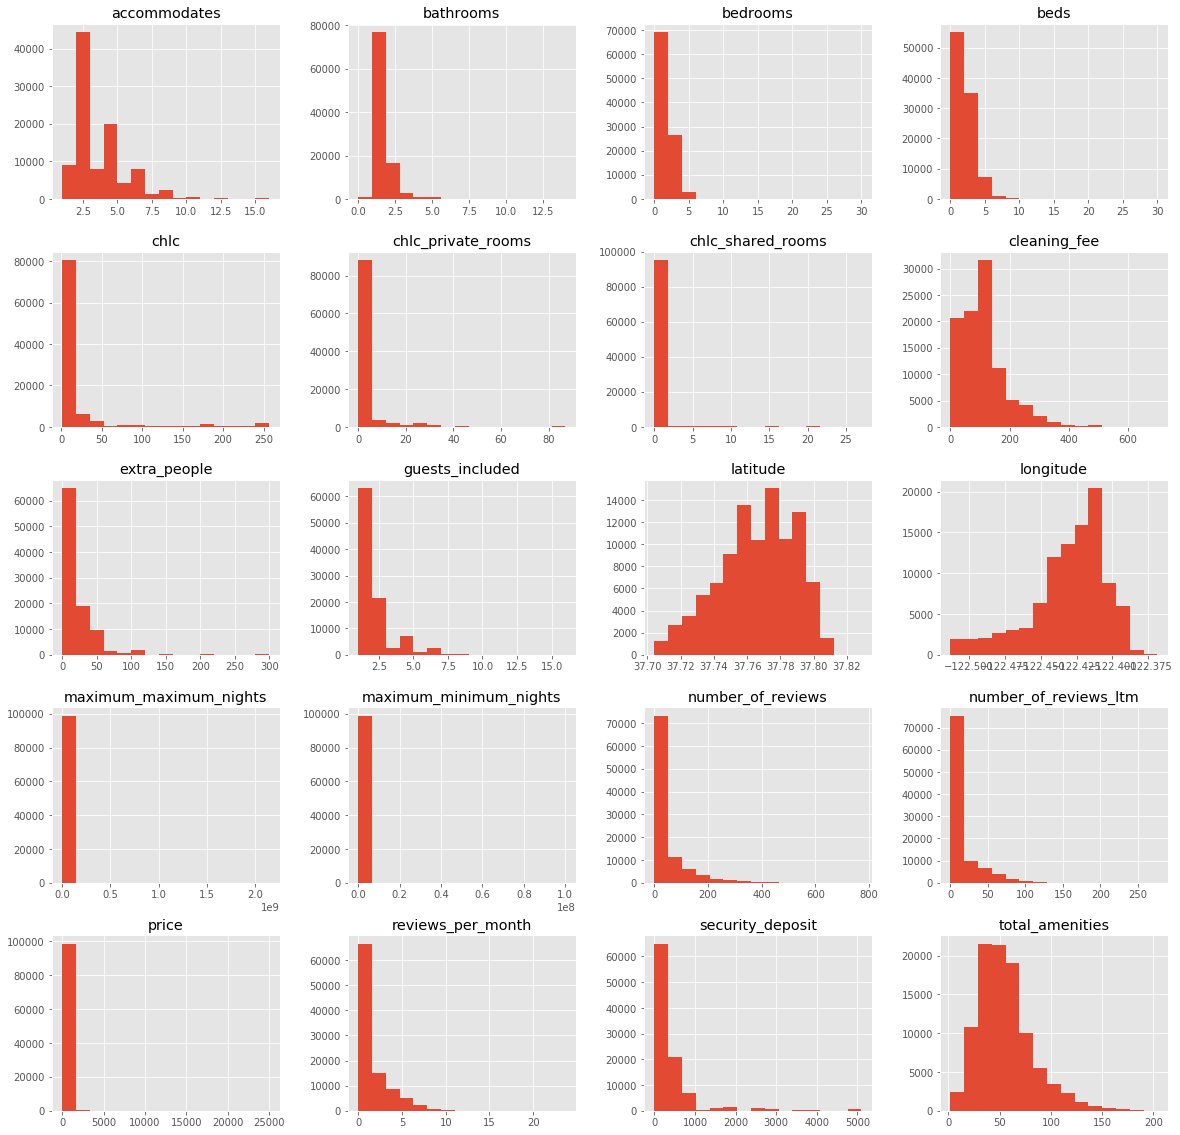

In [90]:
#Subset data to visualize distributions of numeric variables
numerics = listings.loc[:,:'total_amenities'].select_dtypes(include=['int64','float64'])

#Plot distributions of numeric data
#NOTE: chlc stands for calculated host listings count
numerics.hist(figsize=(20,20), bins = 15);

### Apply Transformations to resolve right-skew on price

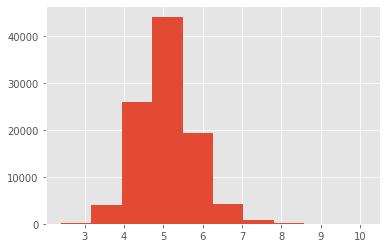

In [91]:
#Test Log function
listings['price'] = np.log( listings['price']+ 1)

#Plot distributions of numerics_log data
listings['price'].hist();
#works well on cleaning fee, price, total amenities

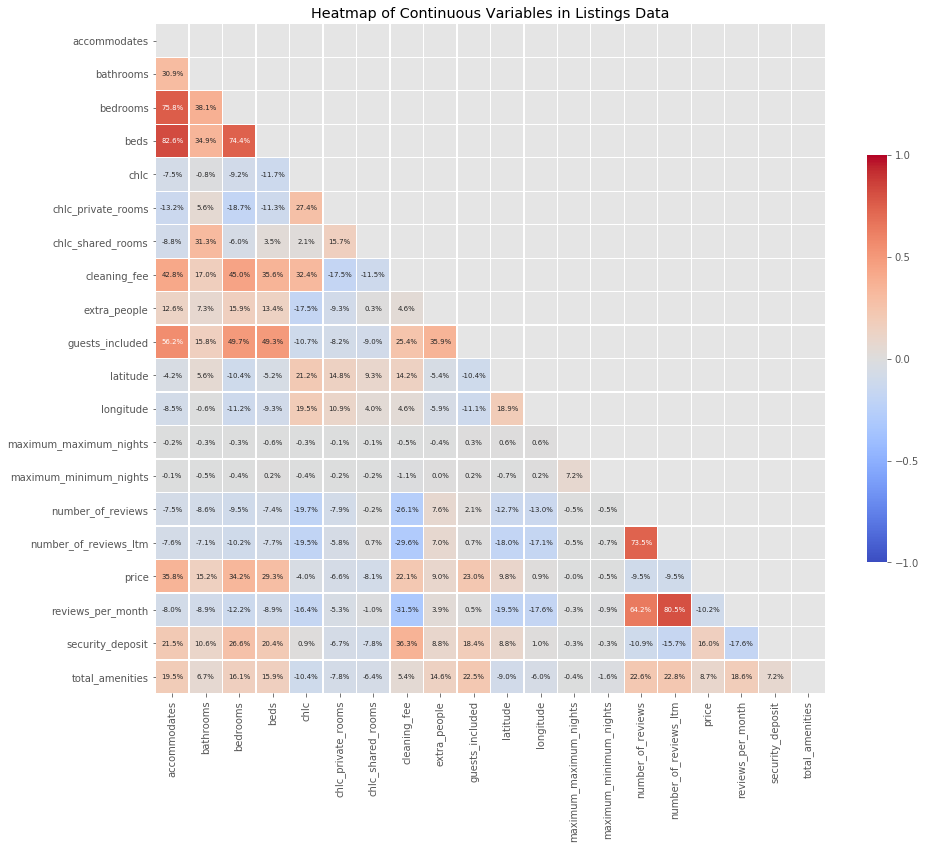

In [92]:
#Create heatmap of numeric data
corr = numerics.corr()

#Setup mask to hide upper triangle of heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 15)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .35,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .5, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 7},
                      fmt='.1%')

#add the column names as labels
ax.set_title('Heatmap of Continuous Variables in Listings Data');

# Encode Dummy Variables

### Booleans

In [93]:
#Subset Boolean values
bools = list(listings.select_dtypes(include=['bool']).columns)

#Convert True and False into ints
listings[bools] = listings[bools].astype(int)

#Check
listings[bools]

,host_has_profile_pic,host_identity_verified,host_is_superhost,instant_bookable,is_location_exact,require_guest_phone_verification,require_guest_profile_picture,requires_license
90917,1,1,0,0,1,0,0,1
75033,1,1,0,0,1,0,0,1
60532,1,1,0,0,1,0,0,1
37974,1,1,0,0,1,0,0,1
15173,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
98791,1,0,0,0,1,0,0,0
98792,1,1,1,1,1,0,0,1
98793,1,1,1,1,1,0,0,1
98794,1,0,0,1,1,0,0,1


In [94]:
listings.head()

,accommodates,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,instant_bookable,is_location_exact,latitude,longitude,maximum_maximum_nights,maximum_minimum_nights,neighbourhood_cleansed,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,state,zipcode,total_amenities,Accessible,Air,Amazon,BBQ,Baby,Babysitter,Balcony,Bath,Bathroom,Bathtub,Beach,Beachfront,Bed,Bedroom,Bidet,Board,Body,Breakfast,Building,Buzzer,Cable,Carbon,Cat,Ceiling,Central,Changing,Chef,Children,Cleaning,Coffee,Convection,Cooking,Crib,DVD,Day,Dining,Disabled,Dishes,Dishwasher,Dog,Doorman,Double,Dryer,Echo,Electric,Elevator,Espresso,Essentials,Ethernet,Exercise,Extra,Family,Fax,Fire,Fireplace,Firm,First,Fixed,Flat,Formal,Free,Full,Game,Garage,Garden,Gas,Ground,Gym,HBO,Hair,Hammock,Handheld,Hangers,Heat,Heated,Heating,High,Host,Hot,Ice,Indoor,Internet,Iron,Ironing,Jetted,Keypad,Kitchen,Kitchenette,Lake,Laptop,Lock,Lockbox,Long,Luggage,Machine,Memory,Microwave,Mini,Mobile,Mountain,Mudroom,Murphy,Netflix,Other,Outdoor,Outlet,Oven,Pack,Paid,Patio,Pets,Piano,Pillow,Play,Pocket,Pool,Printer,Private,Projector,Rain,Refrigerator,Roll,Rooftop,Room,Safety,Self,Shampoo,Shared,Shower,Single,Ski,Smart,Smoke,Smoking,Soaking,Sound,Stair,Stand,Standing,Steam,Step,Stove,Suitable,Sun,Table,Tennis,Terrace,Toilet,Touchless,Walk,Warming,Washer,Waterfront,Well,Wheelchair,Wide,Wifi,Window,Wine,access,accessible,aid,air,allowed,alone,and,area,around,backyard,balcony,bar,bars,basics,bath,bathroom,bed,bedroom,before,blankets,books,card,cellar,chair,charger,check,checkout,clearance,comforts,computer,conditioning,connection,console,cooler,corner,court,covers,crib,darkening,deck,detector,dining,dinnerware,door,doorway,drawer,dropoff,dryer,enter,entrance,entryway,equipment,essentials,events,extinguisher,fan,faucets,fireplace,floor,floors,foam,for,free,fridge,friendly,front,gates,grab,greets,grill,guards,guest,guests,gym,hallway,hallways,head,height,hoist,home,hosting_amenity_49,hosting_amenity_50,hot,hour,intercom,kettle,kid,kit,kitchen,lamps,level,linens,lit,live,living,lock,loungers,machine,maker,mattress,missing,monitor,monoxide,off,out,oven,paper,parking,path,pet,pillows,pit,player,pool,premises,profiling,property,purifier,rack,recommendations,resolution,room,screen,seating,shades,shower,silverware,soap,space,spot,staff,stairs,stays,steam,steps,street,suite,system,table,term,this,toilet,top,towel,toys,translation,travel,tub,valet,view,water,wifi,wireless,with,workspace,you,None,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,photographer,reviews,selfie,sent_id,weibo,work_email,zhima_selfie
90917,4,23,92,1.00,Real Bed,1.00,2.00,1,0.00,0.00,strict_14_with_grace_period,San Francisco,120.00,10.00,2,1,1,0,100.0,within an hour,0,1,37.75,-122.42,60.00,30.00,Mission,3,0.00,5.17,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.03,Entire home/apt,1000.00,CA,94110,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Int's and objects

In [95]:
#Get dummies on object variables and store into temp
temp=pd.get_dummies(listings.select_dtypes(include=['object']))

#Combine listings with dummies in temp
listings = pd.concat([listings, temp], axis=1)

#Remove original features that dummies in temp encoded for
objects = list(listings.select_dtypes(include=['object']).columns)
listings.drop(columns= objects, inplace=True)

# Write finalized file to csv

In [96]:
#View final shape of listings data
print('Final shape of listings data: ', listings.shape)

Final shape of listings data:  (98781, 545)


In [97]:
#Set path on local machine to write listings 
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Write listings to path
listings.to_csv(path + '/2020_0213_Listings_Processed.csv', sep = ',', )